## Intro

SOM is **unsupervised** machine learning techniques. It can be used for **clustering**. 

An SOM is a type of artificial neural network but is trained using **competitive learning** rather than the error-correction learning (e.g., backpropagation with gradient descent) used by other artificial neural networks. The SOM was introduced by the Finnish professor, Teuvo Kohonen in the 1980s and therefore is sometimes called a **Kohonen map** or **Kohonen network**.


## Competitive Learning


Competitive learning is a form of **unsupervised learning** in artificial neural networks, in which nodes compete for the right to respond to a subset of the input data.

Competitive learning works by increasing the specialization of each node in the network. It is well suited to **finding clusters** within data.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import make_classification, make_biclusters, make_blobs
import sklearn as sk
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
import copy
from matplotlib import animation
import IPython
from matplotlib import rc
rc('animation', html='jshtml')

In [ ]:
n_samples = 100
n_features = 2
n_classes = 2

n_pointx = 30
n_pointy = 30

In [ ]:
data, labels = make_classification(n_samples=n_samples, n_features=n_features, n_informative=2, n_redundant=0, n_repeated=0, n_classes=n_classes,
                         n_clusters_per_class=1, class_sep=2, flip_y=0.0)

In [ ]:
data

array([[ 1.99069708,  2.10147841],
       [ 1.66923467,  2.00178307],
       [ 2.49432811,  1.58863762],
       [ 2.04535274,  2.07068568],
       [ 1.4937102 ,  1.7534001 ],
       [-1.93096543,  2.18924499],
       [-1.93338429,  1.54318286],
       [ 1.05652649,  2.2551959 ],
       [ 1.47473259,  2.25974756],
       [ 1.29119062,  2.26898478],
       [ 3.42941155,  1.43418884],
       [-1.47862113,  1.5173617 ],
       [ 1.31625644,  2.20588992],
       [ 1.84585919,  2.02401136],
       [ 1.2359635 ,  2.76405406],
       [-1.89269999,  1.95096907],
       [-1.90680996,  1.89181357],
       [-1.73221943,  1.90219398],
       [-2.86924747,  2.96836827],
       [-1.44094999,  1.25411077],
       [ 1.4804437 ,  2.34925335],
       [ 1.7768528 ,  2.26484202],
       [-2.12673355,  2.12876655],
       [-1.28794573,  1.48369517],
       [ 2.29300315,  1.94599209],
       [ 2.01091922,  1.96491777],
       [-1.82441216,  1.27615674],
       [ 2.14479189,  2.48097632],
       [-0.924317  ,

In [ ]:
labels

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
px.scatter(x=data[:, 0], y=data[:, 1], color=labels)

## Initialize Weight Grids

In [ ]:
a = np.linspace(0, 1, n_pointx)
b = np.linspace(0, 1, n_pointy)
xp, yp = np.meshgrid(a, b)

In [ ]:
xp

array([[0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
        0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
        0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
        0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
        0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
        0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ],
       [0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
        0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
        0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
        0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
        0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
        0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ],
       [0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
        0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
        0.34482759, 0.37931034, 0.4137931 , 0.

In [ ]:
yp

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276],
       [0.06896552, 0.06896552, 0.06896552, 0.06896552, 0.06896552,
        0.06896552, 0.06896552, 0.06896552, 0.06896552, 0.06896552,
        0.06896552, 0.06896552, 0.06896552, 0.

### SOM Grid

In [ ]:
som_grid = []
for i in range(n_pointx):
    for j in range(n_pointy):
        som_grid.append([xp[j, i], yp[j, i]])

som_grid = np.array(som_grid)

In [ ]:
som_grid

array([[0.        , 0.        ],
       [0.        , 0.03448276],
       [0.        , 0.06896552],
       ...,
       [1.        , 0.93103448],
       [1.        , 0.96551724],
       [1.        , 1.        ]])

In [ ]:
som_grid.shape

(900, 2)

The coordinates of each cell of the mesh 2D grid

In [ ]:
som_grid_reshaped = som_grid.reshape((n_pointx, n_pointy, n_features))

In [ ]:
som_grid_reshaped

array([[[0.        , 0.        ],
        [0.        , 0.03448276],
        [0.        , 0.06896552],
        ...,
        [0.        , 0.93103448],
        [0.        , 0.96551724],
        [0.        , 1.        ]],

       [[0.03448276, 0.        ],
        [0.03448276, 0.03448276],
        [0.03448276, 0.06896552],
        ...,
        [0.03448276, 0.93103448],
        [0.03448276, 0.96551724],
        [0.03448276, 1.        ]],

       [[0.06896552, 0.        ],
        [0.06896552, 0.03448276],
        [0.06896552, 0.06896552],
        ...,
        [0.06896552, 0.93103448],
        [0.06896552, 0.96551724],
        [0.06896552, 1.        ]],

       ...,

       [[0.93103448, 0.        ],
        [0.93103448, 0.03448276],
        [0.93103448, 0.06896552],
        ...,
        [0.93103448, 0.93103448],
        [0.93103448, 0.96551724],
        [0.93103448, 1.        ]],

       [[0.96551724, 0.        ],
        [0.96551724, 0.03448276],
        [0.96551724, 0.06896552],
        .

In [ ]:
som_grid_reshaped.shape

(30, 30, 2)

### Weights

### Weight Initialization Pattern

There are 2 ways of weight initialization techniques-

1. The weights values is the same as the som grid values.

    In this method, all the weights can be laid out in a-
    
    * meshgrid
    * randomly.

* If we design the som points as meshgrid, the weights will be in a meshgrid fashion.
* If the som points is initliazed randomly, the weights will be in randomly layout fashion, not in meshgrid fashion.

2. The weight values are different from som grid values. The weights are initialized randomly.


The weights of each cell of the som grid. The weights is of 2 dimension, because the data has 2 features and for each features we need 2 weight vector, each for all grid cells

#### Method 2:

Storing weights for each cell in a seperate array

In [ ]:
weights = np.random.rand(n_pointx*n_pointy, n_features)

In [ ]:
weights

array([[0.72653215, 0.46182856],
       [0.80287231, 0.45678893],
       [0.77412615, 0.97004541],
       ...,
       [0.08428673, 0.66275754],
       [0.90990954, 0.25029109],
       [0.45014197, 0.72516418]])

In [ ]:
weights.shape

(900, 2)

In [ ]:
weights_reshaped = weights.reshape((n_pointx, n_pointy, n_features))

In [ ]:
weights_reshaped

array([[[0.72653215, 0.46182856],
        [0.80287231, 0.45678893],
        [0.77412615, 0.97004541],
        ...,
        [0.44544529, 0.35392402],
        [0.50284612, 0.71453965],
        [0.39260813, 0.19546023]],

       [[0.94693039, 0.89376878],
        [0.27909109, 0.77918531],
        [0.78420904, 0.21062721],
        ...,
        [0.44282362, 0.62420807],
        [0.0276179 , 0.06291458],
        [0.30882855, 0.96013925]],

       [[0.78455642, 0.41946624],
        [0.57552686, 0.41605717],
        [0.74120873, 0.14907853],
        ...,
        [0.87178751, 0.46964063],
        [0.25455671, 0.75480084],
        [0.94652429, 0.65735906]],

       ...,

       [[0.54417261, 0.01873198],
        [0.555409  , 0.88045885],
        [0.80132501, 0.17658593],
        ...,
        [0.84902124, 0.46162526],
        [0.34860453, 0.95445701],
        [0.41596981, 0.45960776]],

       [[0.93316655, 0.9246831 ],
        [0.4237651 , 0.4555477 ],
        [0.44764553, 0.4321804 ],
        .

In [ ]:
weights_reshaped.shape

(30, 30, 2)

Text(0.5, 1.0, 'Connected SOM points with their corresponding Weights points')

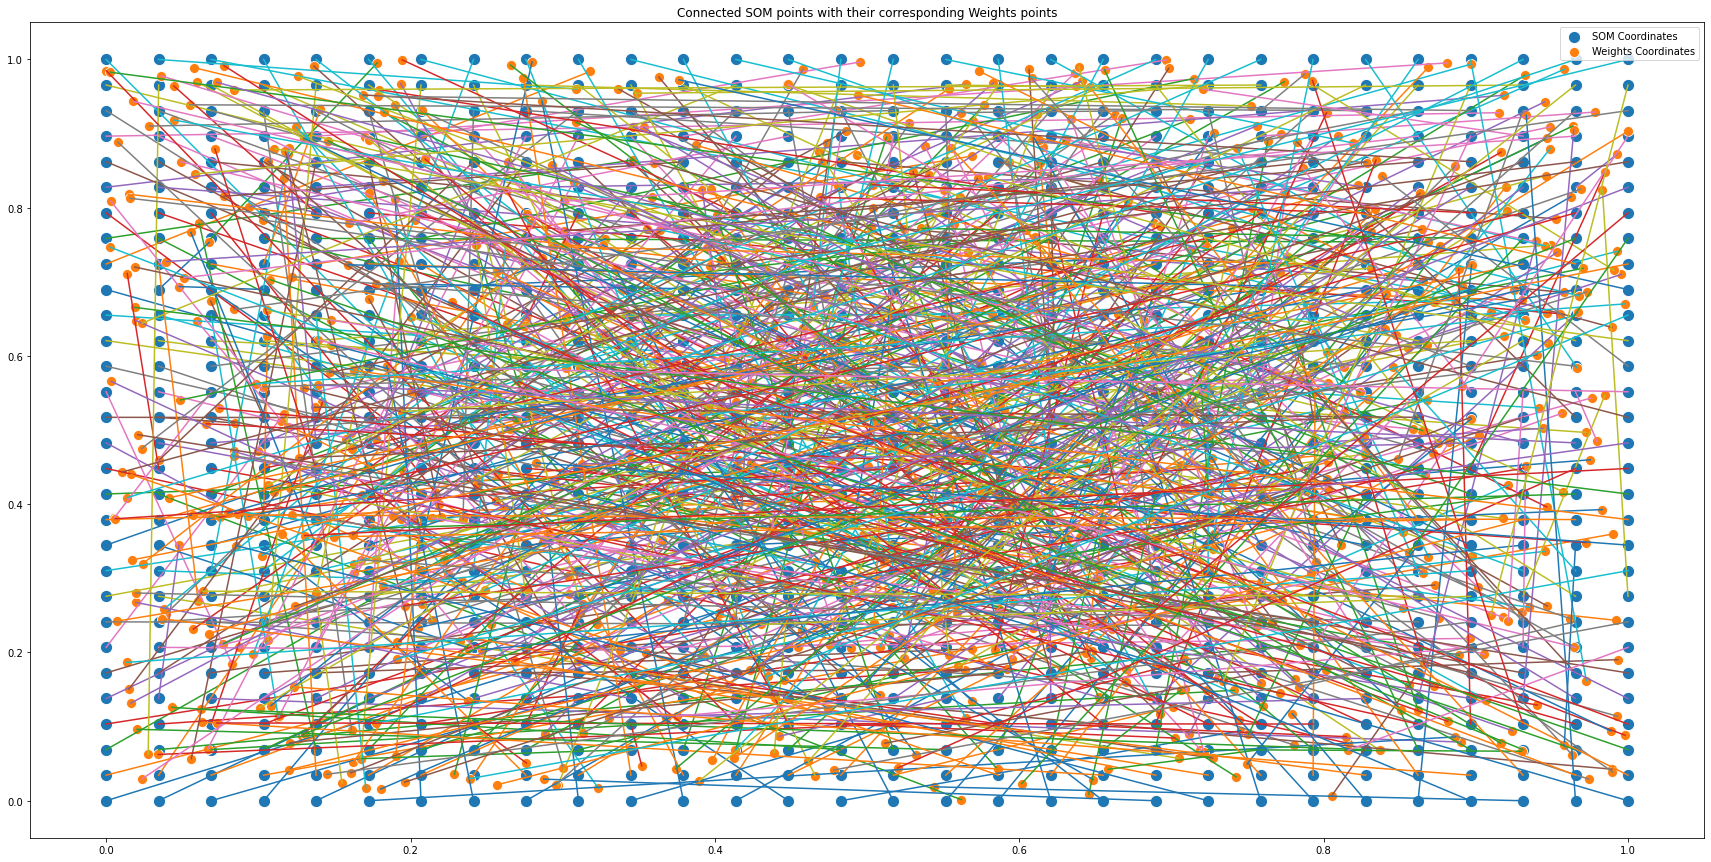

In [ ]:
plt.figure(figsize=(30, 15))
sb.scatterplot(x=som_grid[:, 0], y=som_grid[:, 1], s=150, label="SOM Coordinates")
sb.scatterplot(x=weights[:, 0], y=weights[:, 1], s=100, label="Weights Coordinates")
for i in range(n_pointx*n_pointy):
    sb.lineplot(x=[som_grid[i][0], weights[i][0]], y=[som_grid[i][1], weights[i][1]])

plt.title("Connected SOM points with their corresponding Weights points")

Text(0.5, 1.0, 'SOM coordinates and Weights coordinates')

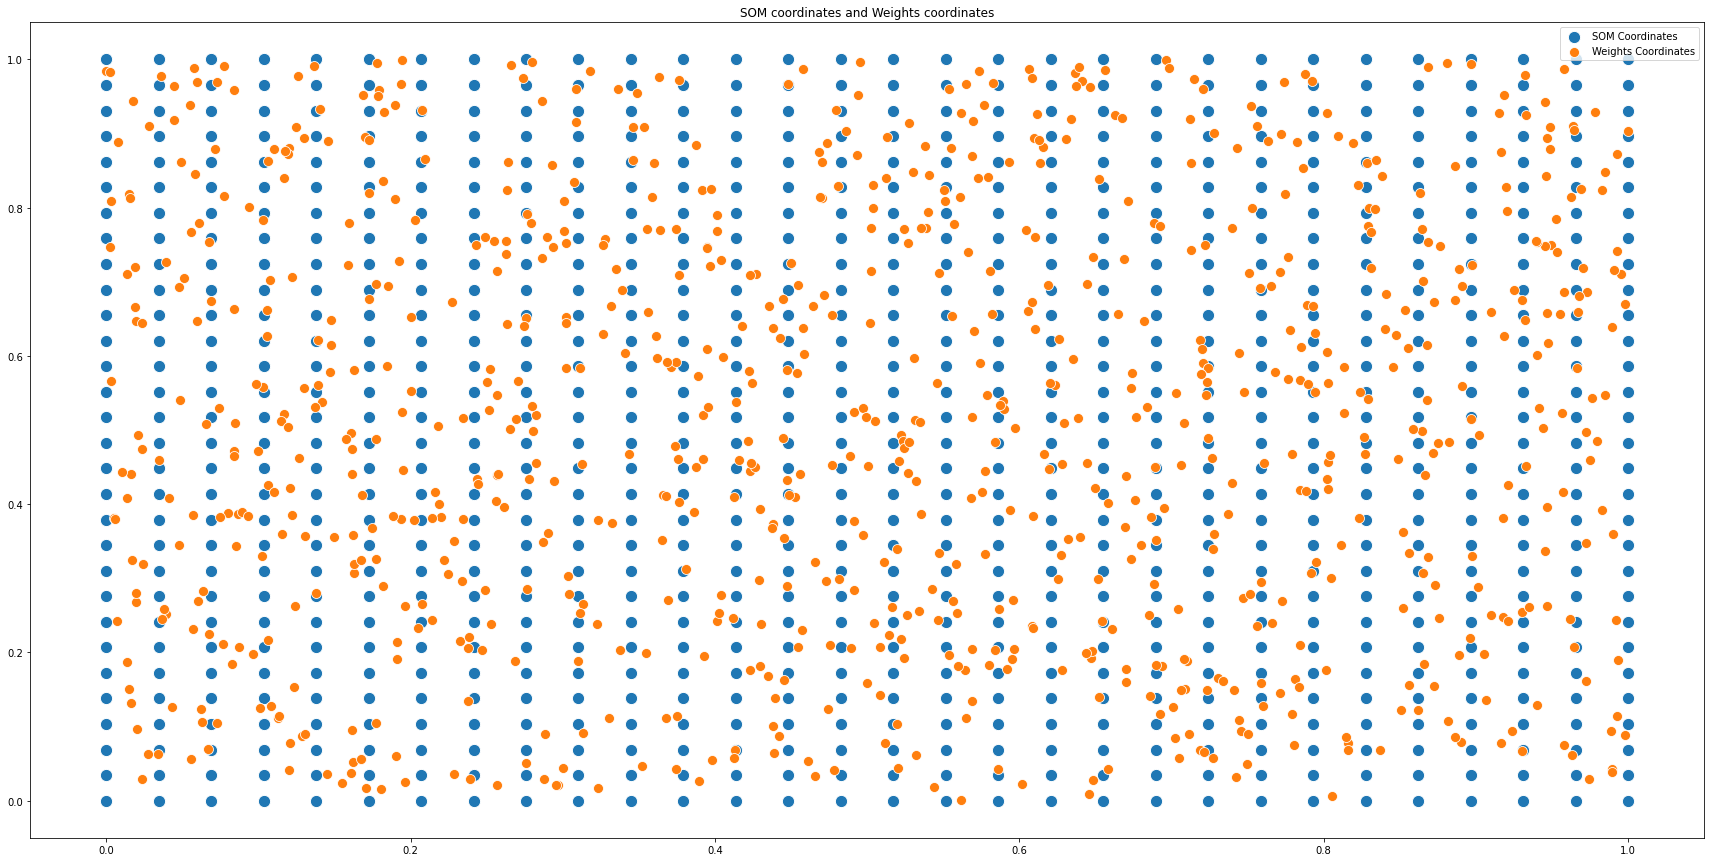

In [ ]:
plt.figure(figsize=(30, 15))
sb.scatterplot(x=som_grid[:, 0], y=som_grid[:, 1], s=150, label="SOM Coordinates")
sb.scatterplot(x=weights[:, 0], y=weights[:, 1], s=100, label="Weights Coordinates")

plt.title("SOM coordinates and Weights coordinates")

#### Method 1:

Storing weights as the 2D coordinates of SOM grid i.e. the weights have the same points as som grid

In [ ]:
weights_as_som = copy.deepcopy(som_grid)

In [ ]:
weights_as_som

array([[0.        , 0.        ],
       [0.        , 0.03448276],
       [0.        , 0.06896552],
       ...,
       [1.        , 0.93103448],
       [1.        , 0.96551724],
       [1.        , 1.        ]])

In [ ]:
weights_as_som.shape

(900, 2)

In [ ]:
weights_as_som_reshaped = weights_as_som.reshape((n_pointx, n_pointy, n_features))

In [ ]:
weights_as_som_reshaped

array([[[0.        , 0.        ],
        [0.        , 0.03448276],
        [0.        , 0.06896552],
        ...,
        [0.        , 0.93103448],
        [0.        , 0.96551724],
        [0.        , 1.        ]],

       [[0.03448276, 0.        ],
        [0.03448276, 0.03448276],
        [0.03448276, 0.06896552],
        ...,
        [0.03448276, 0.93103448],
        [0.03448276, 0.96551724],
        [0.03448276, 1.        ]],

       [[0.06896552, 0.        ],
        [0.06896552, 0.03448276],
        [0.06896552, 0.06896552],
        ...,
        [0.06896552, 0.93103448],
        [0.06896552, 0.96551724],
        [0.06896552, 1.        ]],

       ...,

       [[0.93103448, 0.        ],
        [0.93103448, 0.03448276],
        [0.93103448, 0.06896552],
        ...,
        [0.93103448, 0.93103448],
        [0.93103448, 0.96551724],
        [0.93103448, 1.        ]],

       [[0.96551724, 0.        ],
        [0.96551724, 0.03448276],
        [0.96551724, 0.06896552],
        .

In [ ]:
weights_as_som_reshaped.shape

(30, 30, 2)

Text(0.5, 1.0, 'SOM as Weights coordinates')

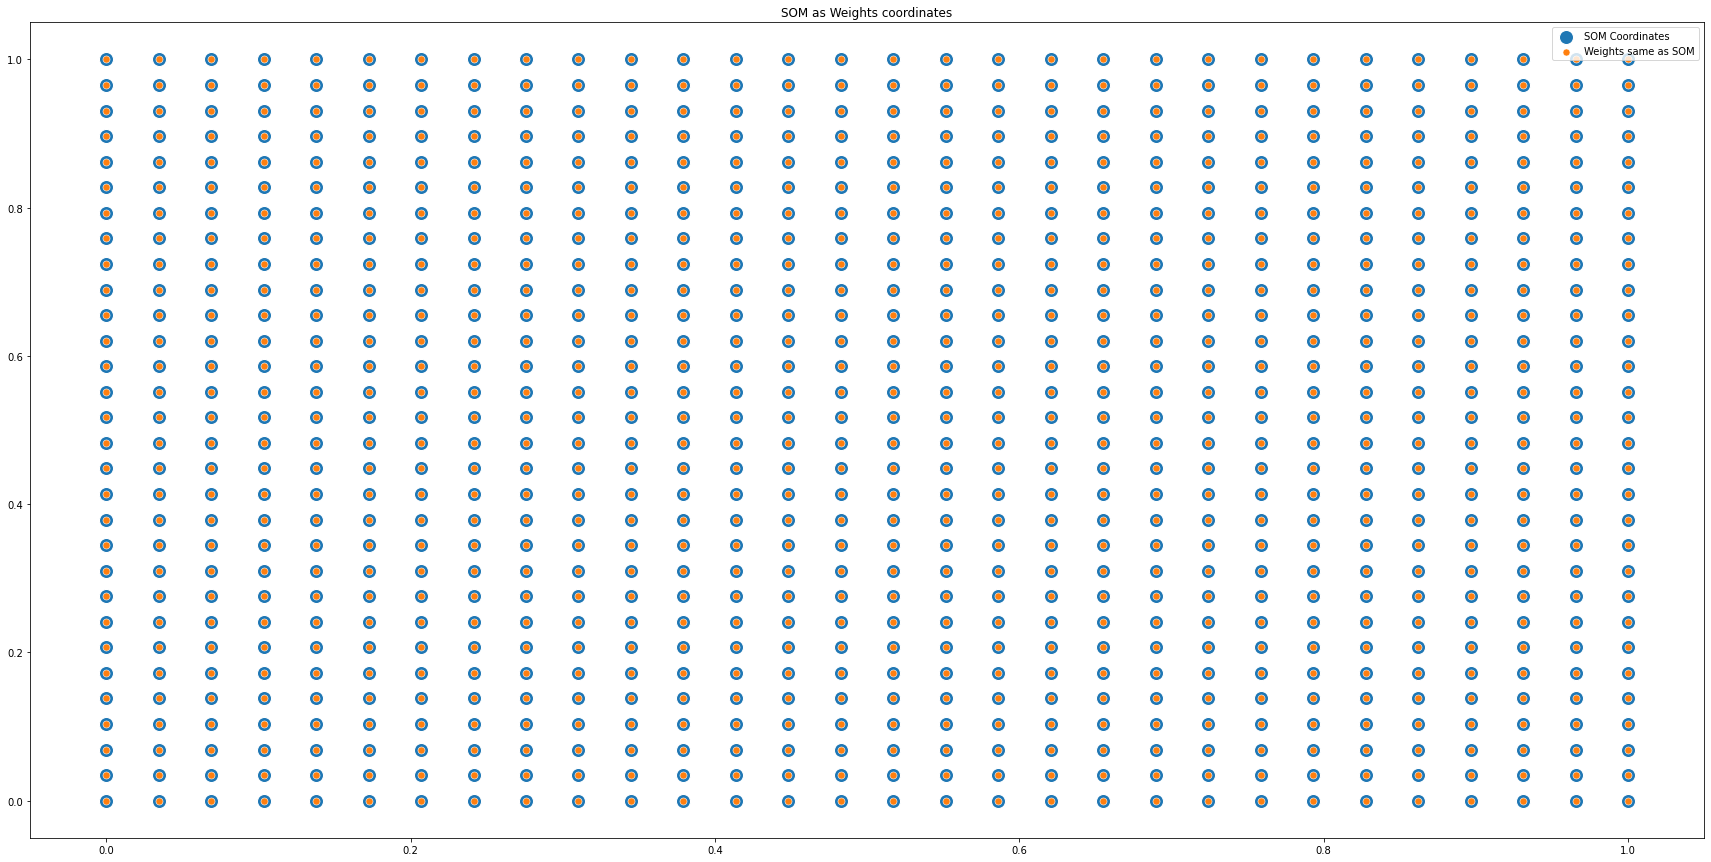

In [ ]:
plt.figure(figsize=(30, 15))
sb.scatterplot(x=som_grid[:, 0], y=som_grid[:, 1], s=200, label="SOM Coordinates")
sb.scatterplot(x=weights_as_som[:, 0], y=weights_as_som[:, 1], s=50, label="Weights same as SOM")

plt.title("SOM as Weights coordinates")

The **SOM grid coordinates** and **Weight coordinates** have the same value. That's why they are have overlapped

### For the visualization purpose we will be taking **SOM coordinates as Weights coordinates**

### Plotting

In [ ]:
data[0]

array([1.99069708, 2.10147841])

Text(0.5, 1.0, 'Single Datapoint and SOM and weights_as_som')

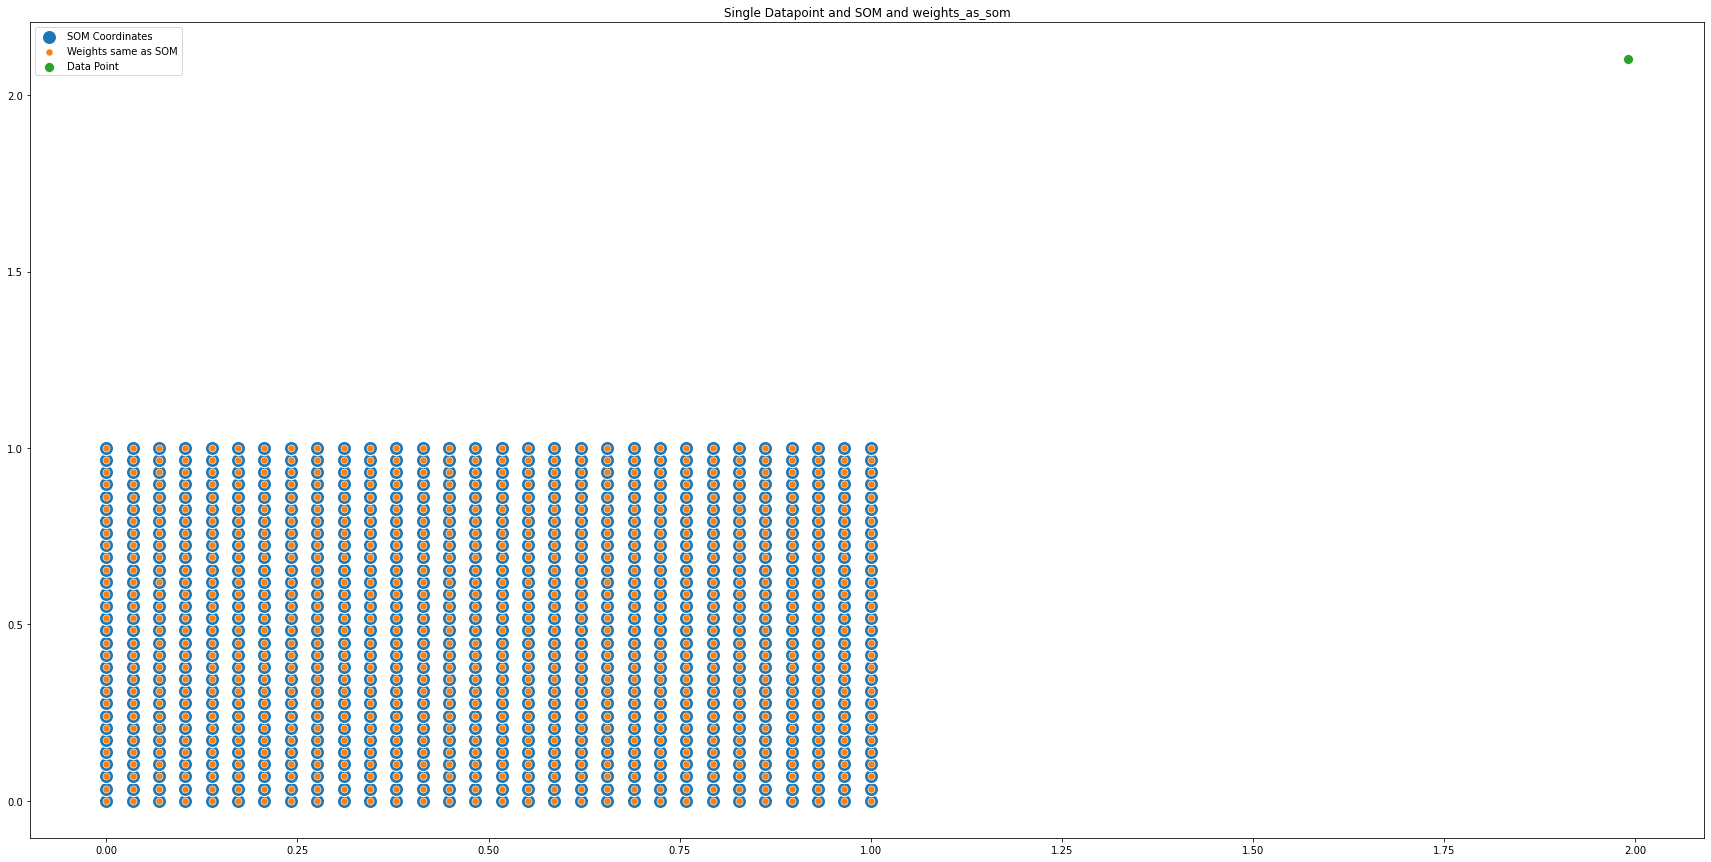

In [ ]:
plt.figure(figsize=(30, 15))
sb.scatterplot(x=som_grid[:, 0], y=som_grid[:, 1], s=200, label="SOM Coordinates")
sb.scatterplot(x=weights_as_som[:, 0], y=weights_as_som[:, 1], s=50, label="Weights same as SOM")
sb.scatterplot(x=[data[0][0]], y=[data[0][1]], s=100, label="Data Point")

plt.title("Single Datapoint and SOM and weights_as_som")

## Euclidean Distance

Taking only single datapoint

In [ ]:
data[0]

array([1.99069708, 2.10147841])

Text(0.5, 1.0, 'Single Datapoint and weights_as_som with connected lines')

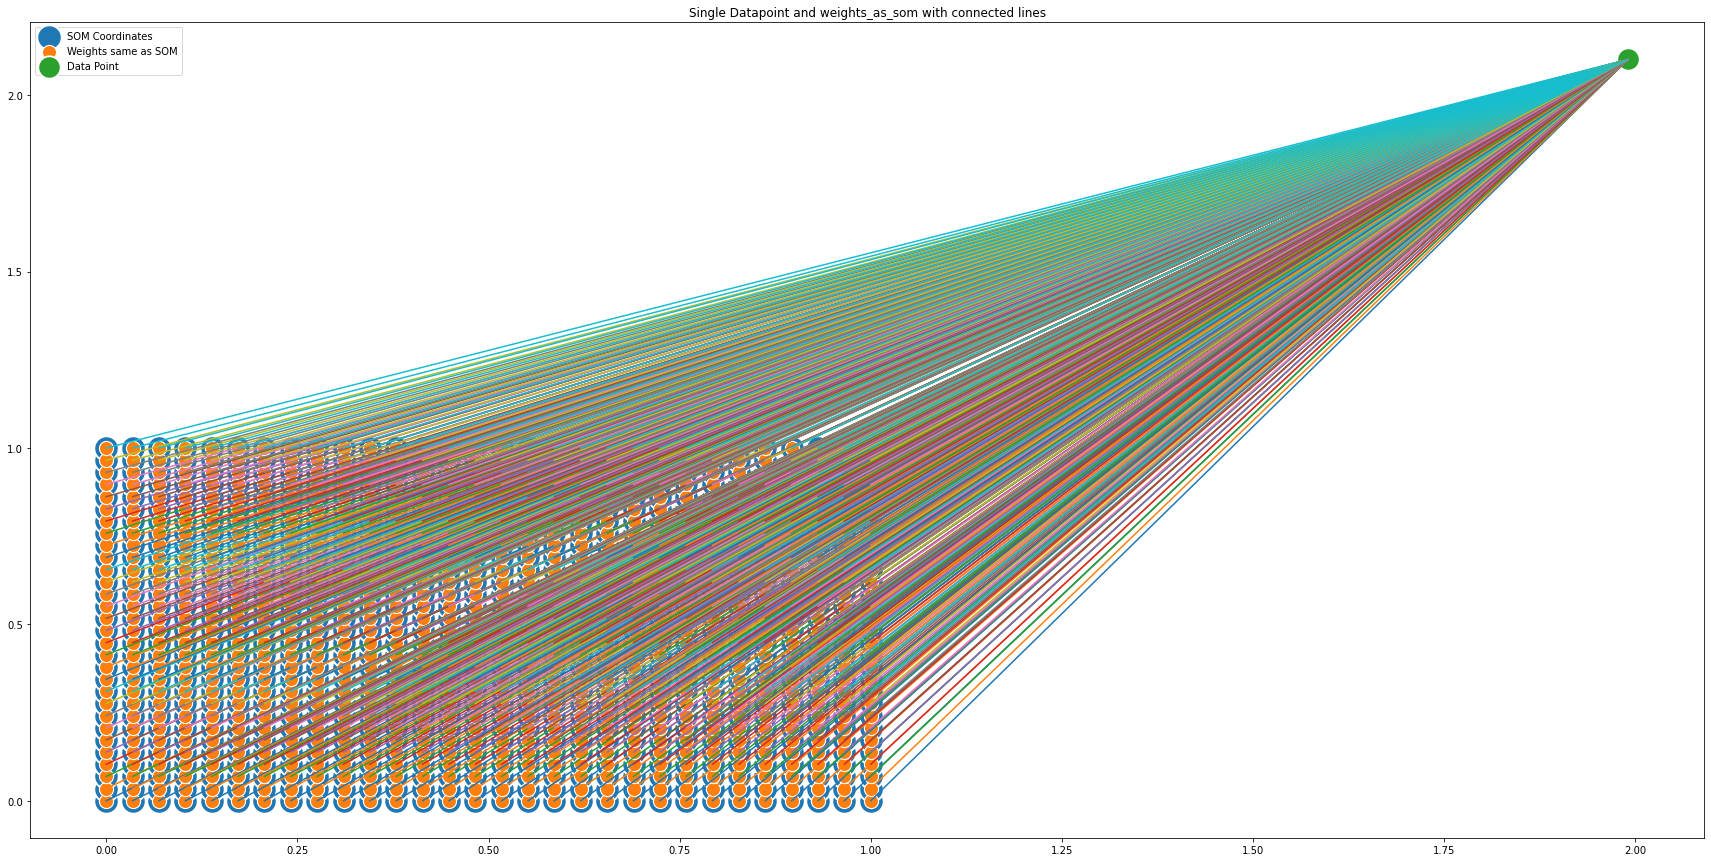

In [ ]:
plt.figure(figsize=(30, 15))
sb.scatterplot(x=som_grid[:, 0], y=som_grid[:, 1], s=600, label="SOM Coordinates")
sb.scatterplot(x=weights_as_som[:, 0], y=weights_as_som[:, 1], s=200, label="Weights same as SOM")
sb.scatterplot(x=[data[0][0]], y=[data[0][1]], s=500, label="Data Point")
for i in range(n_pointx*n_pointy):
    sb.lineplot(x=[weights_as_som[i][0], data[0][0]], y=[weights_as_som[i][1], data[0][1]])

plt.title("Single Datapoint and weights_as_som with connected lines")

## Algorithm

The basic algorithm for training an SOM is given below:

1. Initialize all grid weights of the SOM
2. Repeat until convergence or maximum epochs are reached
    * Shuffle the training examples
    * For each training instance x

        * Find the best matching unit BMU
        * Update the weight vector of BMU and its neighboring cells

## Updating the weights

$$
    w_{ij}^{(t+1)} = w_{ij}^{(t)} + \Delta w_{ij}^{(t)}
$$

$$
    \Delta w_{ij}^{(t)} = \eta^{(t)} f_{i,j}(g, h, \sigma_t)(x - w_{ij}^{(t)})
$$

where, 

$t$ = epoch number

$(g, h)$ = coordinates of BMU

$\eta$ = learning rate

$\sigma_t$ = radius

$f_{ij}(g, h, \sigma_t)$ = neighbourhood distance function

The learning rate is kept high in the start and it gradually decays as epochs goes by-

$$
    \eta^{(t)} = \eta^{(0)} * e^{-(t * \lambda)}
$$

where, 

$\lambda \lt 0 $ = decay rate

The radius also kept high in the beginning and it decays as per epochs-

$$
    \sigma^{(t)} = \sigma^{(0)} * e^{-(t*\beta)}
$$

where, 

$\beta \lt 0$ = decay rate

The neighbothood function is given by-

$$
    f_{ij}(g, h, \sigma_t) = e^{\frac{-d((i, j), (g, h))^2}{2 \sigma_t^2}}
$$

where, 

$d((i, j), (g, h))^2$ = distance between $(i, j)$ coordinates of a cell and $(g, h)$ coordinates of BMU.

$\sigma_t$ = radius at epoch $t$

In [ ]:
data[0].shape

(2,)

In [ ]:
weights_as_som[0].shape

(2,)

In [ ]:
def findBestBMU(data, som_grid):
    euc_dist = []
    for i in range(som_grid.shape[0]):
        dist = np.linalg.norm(data - som_grid[i])
        euc_dist.append(dist)

    euc_dist = np.array(euc_dist)
    # print(euc_dist)
    return np.argmin(euc_dist)

In [ ]:
def neighborhoodFunction(cell_coord, bmu_coord, radius):
    dist = np.linalg.norm(cell_coord - bmu_coord)
    
    numerator_part = -(dist**2)
    denominator_part = 2 * (radius**2)

    expo_part = numerator_part / denominator_part

    res = np.exp(expo_part)

    return res

In [ ]:
def delWeights(learning_rate, train_data, weight_value, som_grid_value, bmu_coord, radius, low_radius=False):
    if low_radius:
        weight_change = learning_rate * (train_data - weight_value)
        return weight_change
    
    else:
        # neighborhood function
        neighborhood_fn = neighborhoodFunction(som_grid_value, bmu_coord, radius)

        weight_change = learning_rate * neighborhood_fn * (train_data - weight_value)

        return weight_change

In [ ]:
def updateWeights(weights, bmu_coord, learning_rate, train_data, som_grid, radius):
    new_weights = []
    
    # Looping through all the weights and updating their weights
    # SOM grid and weights have the same size

    for i in range(weights.shape[0]):
        # Weight Change
        del_weights = delWeights(learning_rate, train_data, weights[i], som_grid[i], bmu_coord, radius, True if radius < 0.001 else False)

        w = weights[i] + del_weights

        new_weights.append(w)

    new_weights = np.array(new_weights)

    return new_weights

In [ ]:
train_data = copy.deepcopy(data)
som_copy = copy.deepcopy(som_grid)
weights_copy = copy.deepcopy(weights_as_som)

In [ ]:
train_data.shape, som_copy.shape, weights_copy.shape

((100, 2), (900, 2), (900, 2))

In [ ]:
train_data[:2, :]

array([[1.99069708, 2.10147841],
       [1.66923467, 2.00178307]])

### NOTE:

The weight change will happen in all of the SOM grid points. Depending on the radius value the effect will take place accordingly.

For a unit $(i,j)$ having a large distance from the BMU, the neighborhood distance function reduces to a near-zero value, leading to a very small magnitude of $\Delta w_{ij}^{(t)}$. 

Hence, such units are unaffected by the training example $x$. One training example, therefore, only affects the BMU and the cells in the close vicinity of the BMU. As we move away from the BMU the change in weights becomes less and less until it is negligible.

In [ ]:
n_epochs = 300

learning_rate_0 = 0.01
radius_0 = 0.1

learning_rate = copy.deepcopy(learning_rate_0)
lambda_decay = -0.001

radius = copy.deepcopy(radius_0)
beta_decay = -0.001

min_idx_list = []
weights_list = [weights_copy]

for t in range(n_epochs):
    print(f"Epoch: {t}")

    # Shuffle
    np.random.shuffle(train_data)

    # For now we use only the first training example
    for i in range(train_data.shape[0]):
        
        # Finding the Best Matching Unit (BMU)
        min_idx = findBestBMU(train_data[i], som_copy)
        min_idx_list.append(min_idx)
        bmu_coord = som_copy[min_idx]

        # Updating the weights
        new_weights = updateWeights(weights_copy, bmu_coord, learning_rate, train_data[i], som_copy, radius)
        # weights_list.append(new_weights)
        weights_copy = new_weights
    
    weights_list.append(weights_copy)

    # Decaying learning rate
    learning_rate = learning_rate_0 * np.exp(-(t * lambda_decay))

    # Decaying radius
    radius = radius_0 * np.exp(-(t * beta_decay))

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99
Epoch: 100

In [ ]:
min_idx_list

[29,
 899,
 899,
 899,
 899,
 29,
 899,
 29,
 29,
 29,
 899,
 29,
 899,
 899,
 899,
 29,
 29,
 29,
 29,
 899,
 899,
 899,
 29,
 899,
 899,
 29,
 899,
 29,
 29,
 29,
 839,
 899,
 899,
 899,
 29,
 899,
 29,
 899,
 899,
 899,
 29,
 899,
 899,
 29,
 899,
 899,
 29,
 899,
 899,
 27,
 899,
 29,
 29,
 899,
 29,
 29,
 9,
 29,
 899,
 27,
 22,
 899,
 18,
 29,
 17,
 26,
 29,
 899,
 29,
 899,
 899,
 899,
 29,
 29,
 29,
 29,
 899,
 29,
 29,
 29,
 899,
 29,
 899,
 29,
 899,
 899,
 899,
 29,
 899,
 899,
 899,
 899,
 899,
 29,
 29,
 29,
 29,
 899,
 899,
 29,
 899,
 29,
 29,
 29,
 29,
 899,
 899,
 899,
 899,
 899,
 899,
 899,
 29,
 899,
 899,
 29,
 899,
 899,
 29,
 899,
 899,
 29,
 27,
 29,
 29,
 26,
 899,
 29,
 899,
 29,
 29,
 29,
 29,
 899,
 899,
 29,
 899,
 899,
 839,
 29,
 899,
 899,
 899,
 899,
 899,
 29,
 29,
 899,
 29,
 17,
 899,
 29,
 29,
 899,
 29,
 899,
 29,
 899,
 899,
 899,
 29,
 29,
 29,
 899,
 29,
 899,
 29,
 29,
 899,
 899,
 899,
 29,
 899,
 9,
 29,
 29,
 899,
 29,
 29,
 29,
 29,
 18,
 2

In [ ]:
weights_list

[array([[0.        , 0.        ],
        [0.        , 0.03448276],
        [0.        , 0.06896552],
        ...,
        [1.        , 0.93103448],
        [1.        , 0.96551724],
        [1.        , 1.        ]]), array([[9.95646634e-07, 2.53109844e-05],
        [2.73419677e-06, 3.45446266e-02],
        [6.66127700e-06, 6.90977253e-02],
        ...,
        [1.29410871e+00, 1.28577091e+00],
        [1.33857991e+00, 1.36163652e+00],
        [1.35433795e+00, 1.40124058e+00]]), array([[1.99121263e-06, 5.06199182e-05],
        [5.46778535e-06, 3.46064807e-02],
        [1.33189433e-05, 6.92298615e-02],
        ...,
        [1.49623265e+00, 1.52498794e+00],
        [1.55519336e+00, 1.60888441e+00],
        [1.57506972e+00, 1.64451982e+00]]), array([[2.99732021e-06, 7.61970440e-05],
        [8.22432396e-06, 3.46688554e-02],
        [2.00182181e-05, 6.93628301e-02],
        ...,
        [1.63287982e+00, 1.68806678e+00],
        [1.69075862e+00, 1.76547782e+00],
        [1.70927254e+00, 1.

In [ ]:
len(weights_list)

301

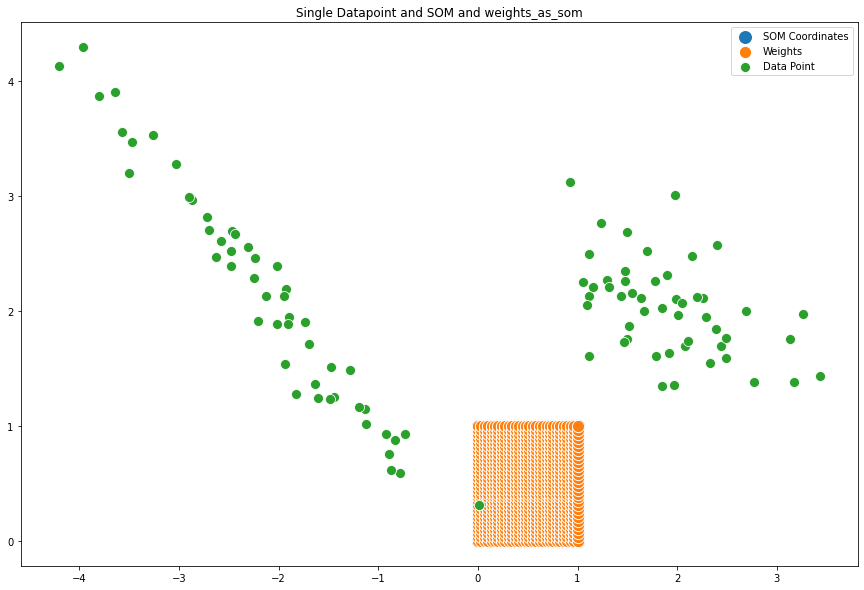

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

def animate(i):
    ax.clear()
    sb.scatterplot(x=som_copy[:, 0], y=som_copy[:, 1], s=200, label="SOM Coordinates", ax=ax)
    sb.scatterplot(x=weights_list[i][:, 0], y=weights_list[i][:, 1], s=150, label="Weights", ax=ax)
    sb.scatterplot(x=data[:, 0], y=data[:, 1], s=100, label="Data Point", ax=ax)

    plt.title("Single Datapoint and SOM and weights_as_som")


anim = animation.FuncAnimation(fig, animate, frames=len(weights_list), repeat=False, interval=100)
IPython.display.HTML(anim.to_html5_video())
# anim

In [ ]:
# writer = animation.ImageMagickWriter()

In [ ]:
# anim.save("som.gif", writer=writer, fps=60)